In [1]:
import yaml

with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

N = config["rnn"]["simulation"]["N"]
timesteps = config["rnn"]["simulation"]["timesteps"]
dt = config["rnn"]["simulation"]["dt"]
alpha = config["rnn"]["simulation"]["alpha"]
beta = config["rnn"]["simulation"]["beta"]

hidden_units_per_layer = config["rnn"]["model"]["hidden_units_per_layer"]
window_size = config["rnn"]["model"]["window_size"]
num_layers = config["rnn"]["model"]["num_layers"]
step_size = config["rnn"]["model"]["step_size"]
dropout = config["rnn"]["model"]["dropout"]
train_size = config["rnn"]["model"]["train_size"]
val_size = config["rnn"]["model"]["val_size"]
test_size = config["rnn"]["model"]["test_size"]
seed = config["rnn"]["model"]["seed"]

epochs = config["rnn"]["training"]["epochs"]
batch_size = config["rnn"]["training"]["batch_size"]
loss = config["rnn"]["training"]["loss"]
learning_rate = config["rnn"]["training"]["learning_rate"]

In [2]:
# Create an instance of the Simulation class
import numpy as np
np.random.seed(seed)
import functions
import os

# Specify the folder path
folder_path = r"D:/School/Magistrska/data"

q_i = np.sin(np.linspace(0, np.pi*2, N))
p_i = np.zeros(N)

sim = functions.Simulation(q_i, p_i, N, timesteps, dt)

# Check if the folder is empty
if len(os.listdir(folder_path)) == 0:
    print("No saved data, running simulation.")

    qs, ps = sim.integrate(alpha, beta)
    
else:
    print("Found some saved data, skipping simulation.")
    
    qs = np.load(folder_path + "\data_qs_3.npy")
    ps = np.load(folder_path + "\data_ps_3.npy")
    
qs = qs[:, 1:-1]
ps = ps[:, 1:-1]

Found some saved data, skipping simulation.


In [3]:
from keras.models import Sequential
from keras.layers import InputLayer, Dropout, Dense, GRU, SimpleRNN
from keras.optimizers import Adam
from keras import initializers

In [4]:
ml = functions.MachineLearning(qs, ps, window_size,step_size, train_size, val_size, test_size)

X, y = ml.make_sequences()

X_train, X_test, X_val, y_train, y_test, y_val = ml.make_split()

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [5]:
model = Sequential()
model.add(InputLayer((window_size, N-2)))

for layer in range(num_layers - 1):
    model.add(SimpleRNN(hidden_units_per_layer, return_sequences=True, dropout=dropout))

model.add(SimpleRNN(hidden_units_per_layer, dropout=dropout))
model.add(Dense(N-2))

model.summary()

# model.layers[0].get_weights()[0][0]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2850      
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 3,156
Trainable params: 3,156
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = Adam(learning_rate)
model.compile(loss=loss, optimizer=optimizer)

In [7]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose = 2, shuffle=False)

Epoch 1/30
3000/3000 - 19s - loss: 0.0480 - val_loss: 0.0686 - 19s/epoch - 6ms/step
Epoch 2/30
3000/3000 - 17s - loss: 0.0420 - val_loss: 0.0165 - 17s/epoch - 6ms/step
Epoch 3/30
3000/3000 - 17s - loss: 0.0483 - val_loss: 0.0256 - 17s/epoch - 6ms/step
Epoch 4/30
3000/3000 - 17s - loss: 0.0543 - val_loss: 0.0263 - 17s/epoch - 6ms/step
Epoch 5/30
3000/3000 - 17s - loss: 0.0604 - val_loss: 0.0485 - 17s/epoch - 6ms/step
Epoch 6/30
3000/3000 - 20s - loss: 0.0637 - val_loss: 0.0421 - 20s/epoch - 7ms/step
Epoch 7/30
3000/3000 - 18s - loss: 0.0664 - val_loss: 0.0537 - 18s/epoch - 6ms/step
Epoch 8/30
3000/3000 - 18s - loss: 0.0765 - val_loss: 0.0589 - 18s/epoch - 6ms/step
Epoch 9/30
3000/3000 - 18s - loss: 0.1125 - val_loss: 0.0939 - 18s/epoch - 6ms/step
Epoch 10/30
3000/3000 - 18s - loss: 0.0626 - val_loss: 0.0624 - 18s/epoch - 6ms/step
Epoch 11/30
3000/3000 - 18s - loss: 0.0922 - val_loss: 0.0757 - 18s/epoch - 6ms/step
Epoch 12/30
3000/3000 - 17s - loss: 0.1022 - val_loss: 0.0908 - 17s/epoch 

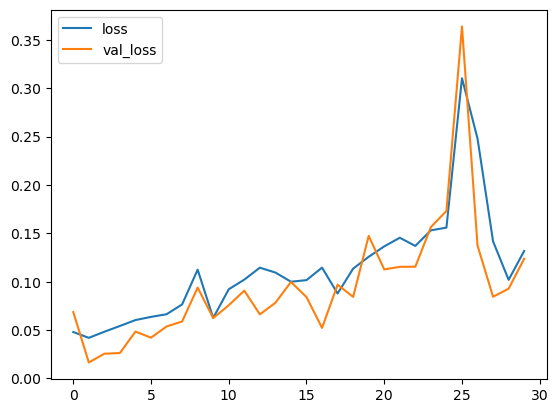

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [12]:
import json
import keras

# model.save(r'D:/School/Magistrska/best_model_RNN/my_model_1s.h5')

# model = keras.models.load_model(r"D:/School/Magistrska/best_model_RNN/gridsearch_1.h5")
# model.summary()
    
# with open(r"D:/School/Magistrska/best_model_RNN/best_params_1.json", 'r') as config_file:
#     best_params = json.load(config_file)

OSError: No file or directory found at D:/School/Magistrska/best_model_RNN/gridsearch_1.h5

In [17]:
ml_2 = functions.MachineLearning(qs, ps, window_size, step_size, train_size, val_size, test_size)

X, y = ml_2.make_sequences()

X_train, X_test, X_val, y_train, y_test, y_val = ml_2.make_split()

In [18]:
test_pred = np.copy(X_test[0])

for k in range(len(X_test)):
    pred = model.predict(test_pred[np.newaxis, -window_size:], verbose=0)
    test_pred = np.concatenate((test_pred, pred), axis = 0)
    
test_pred = test_pred[window_size:]

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000024B9CDC7B50>
Traceback (most recent call last):
  File "c:\Users\Grand\anaconda3\envs\Magistrska_3.10\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(functions.MachineLearning.postprocess(y_test), functions.MachineLearning.postprocess(test_pred))
print("MSE = ", mse)

In [ ]:
import matplotlib.pyplot as plt

for particles in range(N-2):
    plt.plot(functions.MachineLearning.postprocess(y_test)[:, particles], color="tab:blue")
    plt.plot(functions.MachineLearning.postprocess(test_pred)[:, particles], color="tab:orange")

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.ylim(-1.2, 1.2)

    # Show the plot
    plt.show()